In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Кластеризация k-means

k-means - один из алгоритмов вероятностного подхода

In [2]:
from sklearn.cluster import KMeans

In [3]:
model = KMeans(n_clusters=3, random_state=100)

#### Функция для создания учебного датасета
Признаки рыб, обитающих в озере

In [4]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array(
        [[3, 3], [6, 9], [9, 3]]
    )
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [5]:
train = make_data(10, 42)
test = make_data(10, 27)

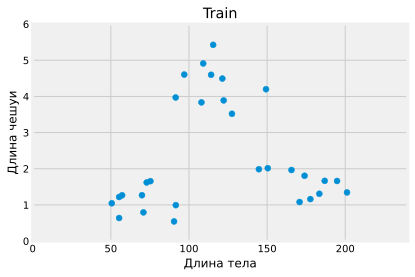

In [6]:
plt.scatter(train['x'], train['y'])

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns= ['x', 'y'])

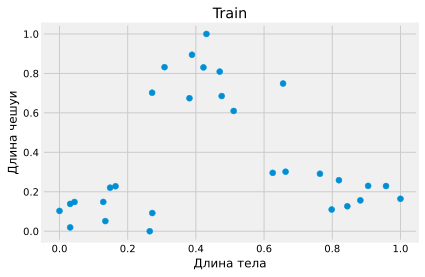

In [10]:
plt.scatter(train_scaled['x'], train_scaled['y'])

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

#### Построение модели кластеризации

In [11]:
train_labels = model.fit_predict(train_scaled)
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1])

#### Центры кластеров

In [12]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

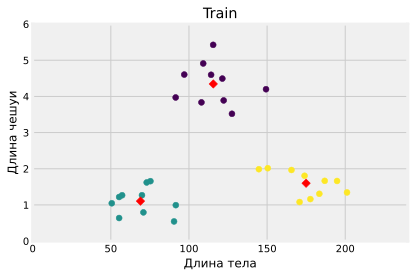

In [13]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

#### Inertia

Сумма квадратов расстояний от объектов до центров их кластеров.

Чем она меньше, тем лучше разбиение на кластеры.
Равна нулю, если кластеров столько же сколько и объектов.

In [14]:
model.inertia_

0.5417377477488049

In [15]:
inertia_arr = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)


2.9002641632095463
0.5417377477488049
0.4281736891174851
0.3258659915567972
0.26736166193637667
0.2072579445597765
0.16774172223409062
0.1467127247607685


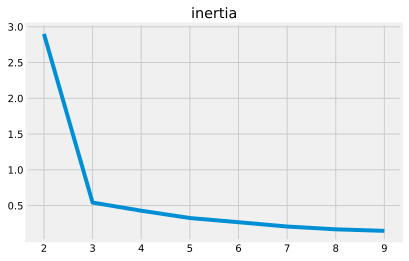

In [16]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('inertia')
plt.show()

#### Отнесение примеров из тестового датасета к определенному кластеру

In [17]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [18]:
test_labels = model.predict(test_scaled)

In [19]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2])

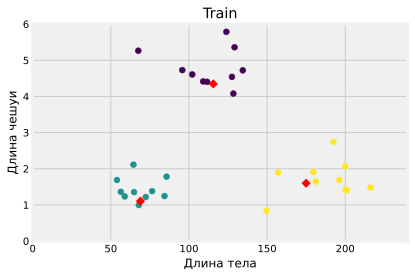

In [20]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

#### AgglomerativeClustering

### Агломеративная кластеризация

Перейдём к _иерархической кластеризации_, которая в свою очередь состоит из _агломеративной_ и _дивизивной_ кластеризации.

Алгоритмы _агломеративной_ кластеризации основаны на объединении мелких кластеров в более крупные. На начальной итерации каждый объект считается отдельным кластером, затем происходит их последовательное объединение. Напротив, _дивизивная_ кластеризация - это обратный процесс: сначала вся выборка считается одним большим кластером, затем происходит последовательное разбиение кластеров на части.

In [21]:
from sklearn.cluster import AgglomerativeClustering

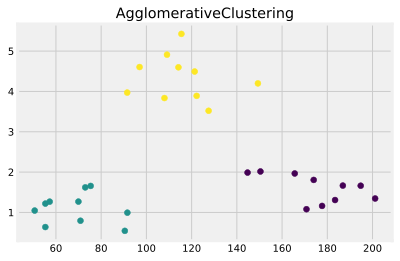

In [22]:
model = AgglomerativeClustering(n_clusters=3)
train_labels = model.fit_predict(train_scaled)

plt.scatter(train['x'], train['y'], c=train_labels)
plt.title('AgglomerativeClustering')
plt.show()

Отметим, что у модели `AgglomerativeClustering` нет метода `.predict`. Поэтому чтобы предсказать разбиение на кластеры для тестовых данных, воспользуемся уже известным нам алгоритмом KNN. Будем использовать полученные только что метки классов `train_labels` для того, чтобы превратить нашу задачу в задачу обучения с учителем.

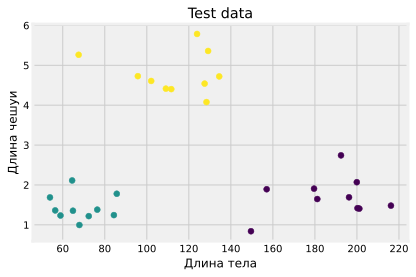

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_labels)

test_labels = knn.predict(test_scaled)

plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test data')
plt.show()

## Понижение размерности данных

### PCA
#### Principal Component Analysis (метод главных компонент)

Создадим небольшой набор данных чтобы на нём познакомиться с методом главных компонент. Это будет набор данных с двумя признаками:

1. количество комнат в доме
2. площадь дома

In [24]:
houses = np.array([
    [5, 1.6],
    [4, 1.4],
    [6, 1.9],
    [3, 1.1],
    [4, 1.25]
])

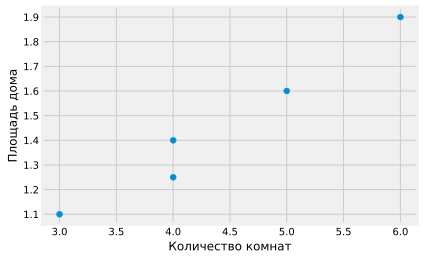

In [25]:
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')

plt.show()

#### Алгоритм PCA

In [26]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

In [27]:
mean_values = np.mean(houses, axis=0)
mean_values

array([4.4 , 1.45])

In [28]:
houses_centered = houses - mean_values
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

Теперь посчитаем _матрицу ковариаций_. Это матрица, состоящая из попарных ковариаций признаков. Это своего рода многомерный аналог дисперсии. Матрицу ковариаций можно посчитать с помощью функции `np.cov`:

In [29]:
covariance_matrix = np.cov(houses_centered.T)
covariance_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

У нас получилась матрица размера $2 \times 2$, поскольку число признаков равно 2. На главной диагонали этой матрицы стоят дисперсии соответствующих признаков. Например, посчитаем дисперсию первого признака вручную:

Здесь мы подали параметр `ddof=1`, чтобы посчитать несмещённую дисперсию.

In [30]:
np.var(houses_centered[:, 0], ddof=1)

1.3

In [31]:
np.var(houses_centered[:, 1], ddof=1)

0.09749999999999998

Теперь найдём _собственные значения_ (_eigenvalues_) и _собственные векторы_ (_eigenvectors_) данной матрицы. Это можно сделать с помощью функции `np.linalg.eig`:

In [32]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print(f'eigenvalues:\n {eigenvalues}')
print(f'eigenvectors:\n {eigenvectors}')

eigenvalues:
 [1.39445221 0.00304779]
eigenvectors:
 [[ 0.96546225 -0.26054298]
 [ 0.26054298  0.96546225]]


Метод главных компонент заключается в том, что если мы хотим сжать число признаков с $n$ признаков до $k$ признаков, то нам выгоднее всего взять $k$ наибольших собственных значений матрицы ковариаций. Этим $k$ наибольшим значениям соответствуют $k$ собственных векторов (обратите внимание, что векторы здесь также записаны в столбцах). Чтобы получить "сжатые" данные, остаётся лишь умножить нашу матрицу объект-признак на эти $k$ векторов-столбцов.

В нашем случае мы хотим получить данные с 1 признаком, поэтому возьмём только первое собственное значение (оно сильно больше, чем второе). Ему соответствует вектор `eigenvectors[:, 0]`. Умножим нашу матрицу с центрированными данными на этот вектор.

In [33]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result_pre

array([ 0.6183588 , -0.39921205,  1.66198394, -1.44283719, -0.4382935 ])

Наконец, расположим эти значения в столбце, чтобы получить матрицу объект-признак:

In [34]:
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

Аналогичное вычисление с помощью библиотеки sklearn:

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
result_ = pca.fit_transform(houses)
print(result_)

[[ 0.6183588 ]
 [-0.39921205]
 [ 1.66198394]
 [-1.44283719]
 [-0.4382935 ]]


Доля объяснённой дисперсии:

In [36]:
pca.explained_variance_ratio_

array([0.99781911])

Потеря меньше одного процента. Допустима потеря до 10%.

### Применение PCA в моделях машинного обучения

In [37]:
X_train = pd.read_pickle('./models/titanic/X_train.pkl')
y_train = pd.read_pickle('./models/titanic/y_train.pkl')

In [38]:
X_valid = pd.read_pickle('./models/titanic/X_valid.pkl')
y_valid = pd.read_pickle('./models/titanic/y_valid.pkl')

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 35.2 KB


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

Сначала мы не будем указывать число компонент.

In [42]:
pca = PCA(random_state=100)

In [43]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [44]:
# Доля объясненной дисперсии каждой компоненты (в порядке уменьшения)
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 1.62658406e-32, 4.13760132e-33])

In [45]:
np.sum(pca.explained_variance_ratio_[:7])

0.9165877504406759

Оставим только 7 главных компонент

In [46]:
pca = PCA(n_components=7, random_state=100)
X_train_mc = pca.fit_transform(X_train_scaled)
X_valid_mc = pca.transform(X_valid_scaled)

Теперь обучим на этих данных модель логистической регрессии.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train_mc, y_train)
y_valid_pred = lr.predict(X_valid_mc)

print(accuracy_score(y_valid, y_valid_pred))

0.8026905829596412


Мы получили вполне приемлемую точность модели несмотря на то, что сильно снизили размерность данных.

## t-SNE

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

Загрузка данных о недвижимости

In [49]:
from sklearn.datasets import load_boston

In [50]:
boston = load_boston()

In [51]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
data = boston.data

In [53]:
feature_names = boston.feature_names

In [54]:
X = pd.DataFrame(data, columns=feature_names)

In [55]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [57]:
price = boston.target

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=.3, random_state=7)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Масштабирование признаков

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [63]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

#### Применение t-SNE

In [64]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)
# learning_rate - плотность расположения точек (рекомендуется от 10 до 1000)

In [65]:
X_train_tsne = tsne.fit_transform(X_train_scaled, y_train)
X_train_tsne[:5]

array([[ 19.730677  , -19.462622  ],
       [ 12.199736  ,   0.45567968],
       [ 27.97631   , -23.147917  ],
       [ 28.23019   , -24.46549   ],
       [ 23.84607   , -17.147873  ]], dtype=float32)

In [66]:
X_train_tsne.shape

(354, 2)

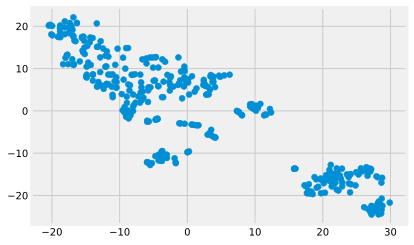

In [67]:
plt.scatter(X_train_tsne[:, 0],X_train_tsne[:, 1])
plt.show()

Разбивка данных на 2 кластера

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=2)

In [70]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [71]:
pd.value_counts(labels_train)

0    232
1    122
dtype: int64

In [72]:
labels_test = kmeans.predict(X_test_scaled)

График t-SNE с известными лейблами:

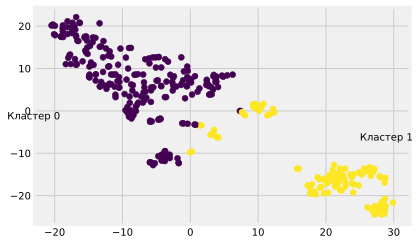

In [73]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -2, 'Кластер 0')
plt.text(25, -7, 'Кластер 1')
plt.show()

Просмотр данных в разных кластерах

In [74]:
y_train.mean()

22.595762711864406

In [75]:
y_train[labels_train == 0].mean()

25.94439655172414

In [76]:
y_train[labels_train == 1].mean()

16.227868852459018

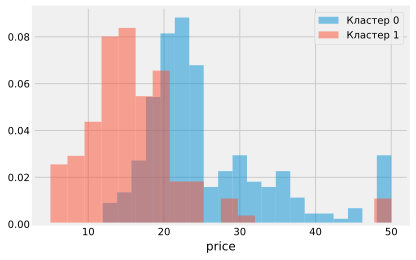

In [77]:
plt.hist(y_train[labels_train==0], bins=20, density=True, alpha=.5)
plt.hist(y_train[labels_train==1], bins=20, density=True, alpha=.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('price')
plt.show()

In [78]:
X_train.loc[labels_train==0, 'RM'].mean()

6.448517241379314

In [79]:
X_train.loc[labels_train==1, 'RM'].mean()

5.909286885245898

In [80]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.26798159482758627

In [81]:
X_train.loc[labels_train==1, 'CRIM'].mean()

9.05679418032787

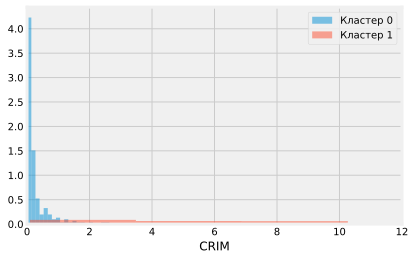

In [82]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins=20, density=True, alpha=.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=20, density=True, alpha=.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM')
plt.show()

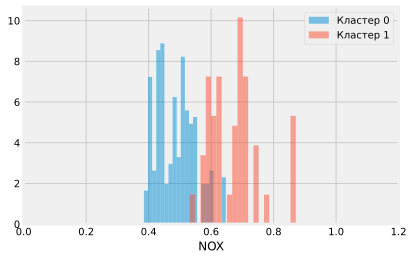

In [83]:
plt.hist(X_train.loc[labels_train==0, 'NOX'], bins=20, density=True, alpha=.5)
plt.hist(X_train.loc[labels_train==1, 'NOX'], bins=20, density=True, alpha=.5)
plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX')
plt.show()

#### Использование информации полученной с помощью t-SNE в моделях

Базовая модель предсказания цены на недвижимость (до разделения на кластеры)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()

In [86]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [87]:
y_test_pred = lr.predict(X_test_scaled)

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score(y_test, y_test_pred)

0.6508417720329545

Две модели построенные на объектах из разных кластеров

In [90]:
# 1-я модель кластер 0
lr.fit(X_train_scaled.loc[labels_train==0, :], y_train[labels_train==0])

LinearRegression()

In [91]:
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])

In [92]:
r2_score(y_test[labels_test==0], y_test_pred_0)

0.831603433529844

In [93]:
#2-я модель кластер 1
lr.fit(X_train_scaled.loc[labels_train==1, :], y_train[labels_train==1])

LinearRegression()

In [94]:
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])

In [95]:
r2_score(y_test[labels_test==1], y_test_pred_1)

0.6458127429551195

In [96]:
# Объединение известных правильных ответов из двух кластеров
y_test_all = np.hstack([y_test[labels_test==0], y_test[labels_test==1]])

In [97]:
# Объединение предсказанных ответов из двух кластеров
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [98]:
r2_score(y_test_all, y_test_pred_all)

0.8055877528812476